# MultiClass Logistic Regression Project

The goal of this project is to predict the Species of some samples of Iris', using the famous Iris dataset.

We would be using sepal length, sepal width, petal length , petal width as features to predict the target, All feature units are in cm



### Importing Starter Libraries and Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Let us check the description of the dataset to see what we are working on

In [5]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let see the features/columns we are going to be working with

In [6]:
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Showing just 10 rows for readability
iris["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Lets see the target classes we are trying to predict

In [8]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


In [9]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So according to our data

Setosa is 0

Versicolor is 1

Virginica is 2

We will turn this dataset into a dataframe for more clarity and make it more understandable

In [10]:
# Creating list of feature names
features = ['sepal length',
 'sepal width',
 'petal length',
 'petal width']

In [11]:
# Appending feature names to corresponding data
iris_df = pd.DataFrame(iris["data"], columns=features)

In [12]:
# Appending target values to dataset
iris_df["target"] = iris["target"]

In [13]:
# Mapping Specie name to corresponding target value
species_name = {
    0 : 'setosa', 
    1 : 'versicolor', 
    2 : 'virginica'
}
iris_df["specie_name"] = iris_df["target"].map(species_name)

In [14]:
iris_df.sample(10)

,sepal length,sepal width,petal length,petal width,target,specie_name
17,5.1,3.5,1.4,0.3,0,setosa
122,7.7,2.8,6.7,2.0,2,virginica
98,5.1,2.5,3.0,1.1,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
146,6.3,2.5,5.0,1.9,2,virginica
54,6.5,2.8,4.6,1.5,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica
75,6.6,3.0,4.4,1.4,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor


### Exploratory Data Analysis

There are no null values in this dataset, so no need for data cleaning

In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int32  
 5   specie_name   150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [16]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


According to the data below, we can see that the species of an iris really depends on the Petal information

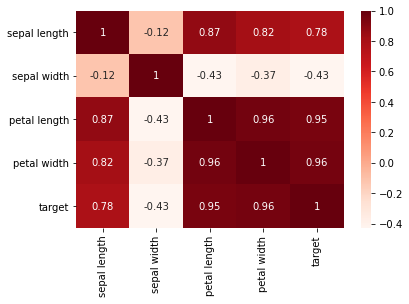

In [17]:
sns.heatmap(iris_df.corr(), cmap="Reds", annot=True);

Interesting, it seems Setosa's sepal and petal length are closey related in a way because they tend to stay closer to the corner of the graph

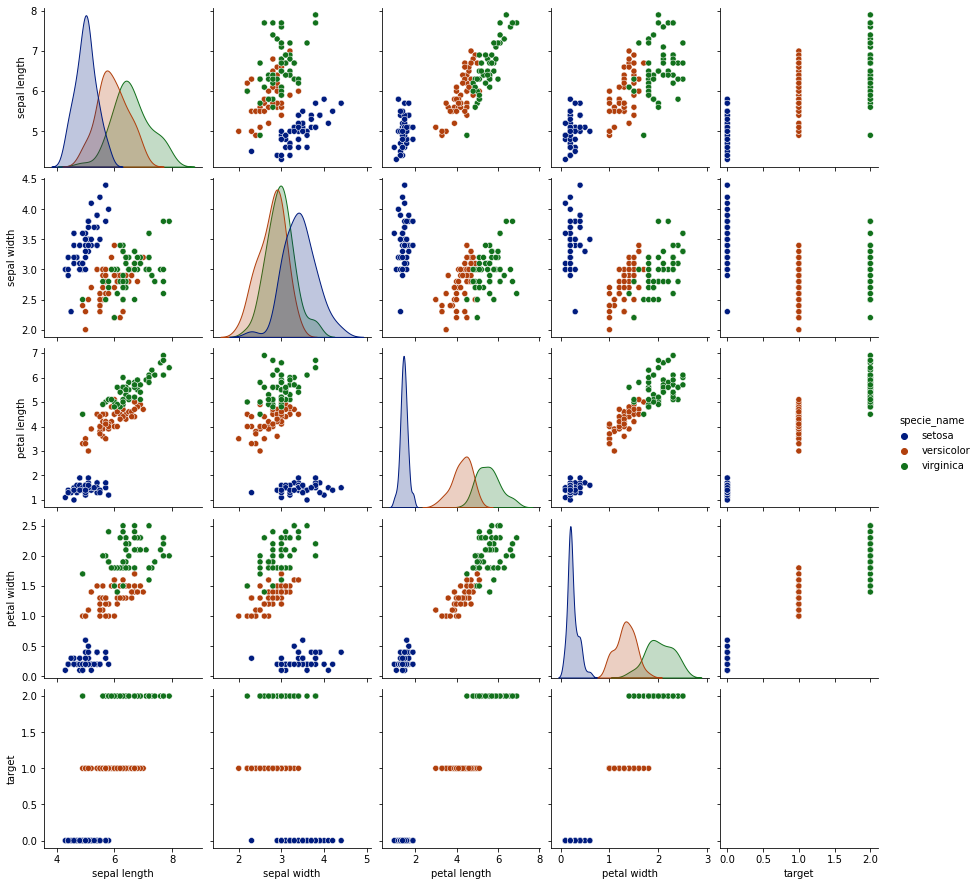

In [18]:
sns.pairplot(iris_df, hue="specie_name", palette="dark");
# sns.pairplot(iris_df, hue="target", palette="dark");

### Train/Test Split

now let us divide our data into features and target variables using 30% to test

In [19]:
X = iris_df.drop(["target", "specie_name"], axis=1)
y = iris_df["target"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [22]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [23]:
y_train.shape, y_test.shape

((105,), (45,))

### Algorithm Selection and Model Training

Lets import Logistic Regression and do the neccessaring training

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

Lets Train our model

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

And predict our test data

In [27]:
predictions = model.predict(X_test)

### Model Evaluation and Performance

Lets compare our test data to our predicitions

In [28]:
compare_df = pd.DataFrame(
    {
        "target" : y_test,
        "prediction": predictions
    }
)
compare_df["target_name"] = compare_df["target"].map(species_name)
compare_df["predicition_name"] = compare_df["prediction"].map(species_name)

In [29]:
compare_df.sample(20)

,target,prediction,target_name,predicition_name
118,2,2,virginica,virginica
90,1,1,versicolor,versicolor
111,2,2,virginica,virginica
59,1,1,versicolor,versicolor
136,2,2,virginica,virginica
145,2,2,virginica,virginica
117,2,2,virginica,virginica
71,1,1,versicolor,versicolor
107,2,2,virginica,virginica
4,0,0,setosa,setosa


In [35]:
# Function to count number of correct values
def identical(serie1, serie2):
    total = 0
    for values in zip(serie1, serie2):
        if values[0] == values[1]:
            total += 1
    return total

In [37]:
match = identical(compare_df["target"], compare_df["prediction"])

In [43]:
match_percent = match / len(compare_df) * 100
print(f"{match_percent:.2f}% of our predictions were correct")

95.56% of our predictions were correct


Let's check the report on our model

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

Let us check the score of our model, Wow 96% is a good score

In [31]:
print(classification_report(y_test, predictions))
# model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [32]:
cm = confusion_matrix(y_test, predictions)

Wow so we mispredicted just 3 values which is really good

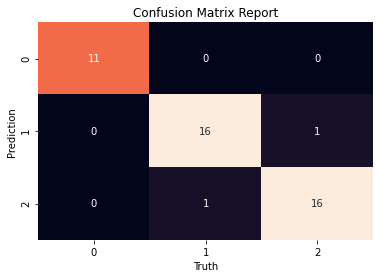

In [33]:
import matplotlib.pyplot as plt

plt.title("Confusion Matrix Report")

sns.heatmap(cm, annot= True, cbar=False)

plt.xlabel("Truth")
plt.ylabel("Prediction");

| Specie  | precision | recall  | 
|------
| 0       | 1.00      | 1.00    | 
| 1       | 0.94      | 0.94    | 
| 2       | 0.94      | 0.94    | 

* Confusion Matrix
![Confusion Matrix](img/cmatrix.png)